In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('/Users/jiaxinye/NYC-taxi-data-science-project/data/train.csv')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 12 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458644 non-null  object        
 1   vendor_id           1458644 non-null  int64         
 2   pickup_datetime     1458644 non-null  datetime64[ns]
 3   dropoff_datetime    1458644 non-null  datetime64[ns]
 4   passenger_count     1458644 non-null  int64         
 5   pickup_longitude    1458644 non-null  float64       
 6   pickup_latitude     1458644 non-null  float64       
 7   dropoff_longitude   1458644 non-null  float64       
 8   dropoff_latitude    1458644 non-null  float64       
 9   store_and_fwd_flag  1458644 non-null  object        
 10  trip_duration       1458644 non-null  int64         
 11  pickup_date         1458644 non-null  object        
dtypes: datetime64[ns](2), float64(4), int64(3), object(3)
memory usage: 13

In [5]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [6]:
weather_data = pd.read_csv('/Users/jiaxinye/NYC-taxi-data-science-project/data/weather_data_nyc.csv')

In [7]:
weather_data.head()

,date,maximum temperature,minimum temperature,average temperature,precipitation,snow fall,snow depth
0,1-1-2016,42,34,38.0,0.00,0.0,0
1,2-1-2016,40,32,36.0,0.00,0.0,0
2,3-1-2016,45,35,40.0,0.00,0.0,0
3,4-1-2016,36,14,25.0,0.00,0.0,0
4,5-1-2016,29,11,20.0,0.00,0.0,0


In [8]:
df['pickup_datetime'] = pd.to_datetime(df.pickup_datetime)
df.loc[:, 'pickup_date'] = df['pickup_datetime'].dt.date
df['dropoff_datetime'] = pd.to_datetime(df.dropoff_datetime)

In [10]:
df['store_and_fwd_flag'] = 1 * (df.store_and_fwd_flag.values == 'Y')

In [11]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,0,455,2016-03-14
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,0,663,2016-06-12
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,0,2124,2016-01-19
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,0,429,2016-04-06
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,0,435,2016-03-26


In [12]:
weather_data.date = pd.to_datetime(weather_data.date)

In [14]:
weather_data['precipitation'] = np.where(weather_data['precipitation']=='T', '0.00',weather_data['precipitation'])
weather_data['precipitation'] = list(map(float, weather_data['precipitation']))

In [15]:
weather_data['snow fall'] = np.where(weather_data['snow fall']=='T', '0.00',weather_data['snow fall'])
weather_data['snow fall'] = list(map(float, weather_data['snow fall']))
weather_data['snow depth'] = np.where(weather_data['snow depth']=='T', '0.00',weather_data['snow depth'])
weather_data['snow depth'] = list(map(float, weather_data['snow depth']))

In [16]:
#merge two datasets on same dates
df['date'] = pd.to_datetime(df['pickup_date'])
train = pd.merge(df, weather_data[['date','minimum temperature', 'precipitation', 'snow fall', 'snow depth']], on= 'date', how = 'left')
df.shape[0]

1458644

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458644 entries, 0 to 1458643
Data columns (total 17 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   id                   1458644 non-null  object        
 1   vendor_id            1458644 non-null  int64         
 2   pickup_datetime      1458644 non-null  datetime64[ns]
 3   dropoff_datetime     1458644 non-null  datetime64[ns]
 4   passenger_count      1458644 non-null  int64         
 5   pickup_longitude     1458644 non-null  float64       
 6   pickup_latitude      1458644 non-null  float64       
 7   dropoff_longitude    1458644 non-null  float64       
 8   dropoff_latitude     1458644 non-null  float64       
 9   store_and_fwd_flag   1458644 non-null  int64         
 10  trip_duration        1458644 non-null  int64         
 11  pickup_date          1458644 non-null  object        
 12  date                 1458644 non-null  datetime64[ns]
 1

In [18]:
train['log_trip_duration'] = np.log(train['trip_duration'].values + 1)

In [19]:
m = np.mean(train['trip_duration'])
s = np.std(train['trip_duration'])
train = train[train['trip_duration'] <= m + 2*s]
train = train[train['trip_duration'] >= m - 2*s]


In [20]:
train.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,minimum temperature,precipitation,snow fall,snow depth,log_trip_duration
count,1.456540e+06,1.456540e+06,1.456540e+06,1.456540e+06,1.456540e+06,1.456540e+06,1.456540e+06,1.456540e+06,1.456540e+06,1.456540e+06,1.456540e+06,1.456540e+06,1.456540e+06
mean,1.534291e+00,1.663941e+00,-7.397349e+01,4.075093e+01,-7.397342e+01,4.075180e+01,5.523364e-03,8.368576e+02,4.673203e+01,8.851502e-02,5.855967e-02,4.064042e-01,6.460025e+00
std,4.988229e-01,1.313611e+00,7.091177e-02,3.286533e-02,7.067435e-02,3.588810e-02,7.411383e-02,6.589297e+02,1.571627e+01,2.336874e-01,9.393728e-01,2.246270e+00,7.748918e-01
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,0.000000e+00,1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.931472e-01
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073589e+01,0.000000e+00,3.970000e+02,3.600000e+01,0.000000e+00,0.000000e+00,0.000000e+00,5.986452e+00
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075453e+01,0.000000e+00,6.620000e+02,4.600000e+01,0.000000e+00,0.000000e+00,0.000000e+00,6.496775e+00
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396302e+01,4.076981e+01,0.000000e+00,1.073000e+03,6.100000e+01,4.000000e-02,0.000000e+00,0.000000e+00,6.979145e+00
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,1.000000e+00,1.141100e+04,7.500000e+01,2.310000e+00,2.730000e+01,2.200000e+01,9.342421e+00


/Users/jiaxinye/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pickup_longitude', ylabel='pickup_latitude'>

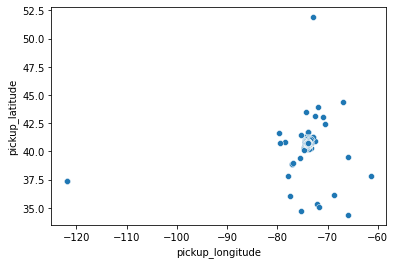

In [21]:

sns.scatterplot('pickup_longitude', 'pickup_latitude', data=train)

In [22]:
#In this graph, we can see that there are some outlier
west, south, east, north = -74.03, 40.63, -73.77, 40.85

train = train[(train.pickup_latitude> south) & (train.pickup_latitude < north)]
train = train[(train.dropoff_latitude> south) & (train.dropoff_latitude < north)]
train = train[(train.pickup_longitude> west) & (train.pickup_longitude < east)]
train = train[(train.dropoff_longitude> west) & (train.dropoff_longitude < east)]

In [23]:
#ccredit to beluga kernel

def haversine_array(lat1, lng1, lat2, lng2):
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371  # in km
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

def dummy_manhattan_distance(lat1, lng1, lat2, lng2):
    a = haversine_array(lat1, lng1, lat1, lng2)
    b = haversine_array(lat1, lng1, lat2, lng1)
    return a + b

def bearing_array(lat1, lng1, lat2, lng2):
    AVG_EARTH_RADIUS = 6371  # in km
    lng_delta_rad = np.radians(lng2 - lng1)
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    x = np.sin(lng_delta_rad) * np.cos(lat2)
    y = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(lng_delta_rad)
    return np.degrees(np.arctan2(x, y))

In [24]:
train.loc[:, 'distance_haversine'] = haversine_array(train['pickup_latitude'].values, train['pickup_longitude'].values, train['dropoff_latitude'].values, train['dropoff_longitude'].values)

train.loc[:, 'distance_dummy_manhattan'] = dummy_manhattan_distance(train['pickup_latitude'].values, train['pickup_longitude'].values, train['dropoff_latitude'].values, train['dropoff_longitude'].values)

train.loc[:, 'direction'] = bearing_array(train['pickup_latitude'].values, train['pickup_longitude'].values, train['dropoff_latitude'].values, train['dropoff_longitude'].values)

In [25]:
train.to_csv('/Users/jiaxinye/NYC-taxi-data-science-project/data/clean_train.csv')

NameError: name 'clean_train' is not defined